## 9.4 A

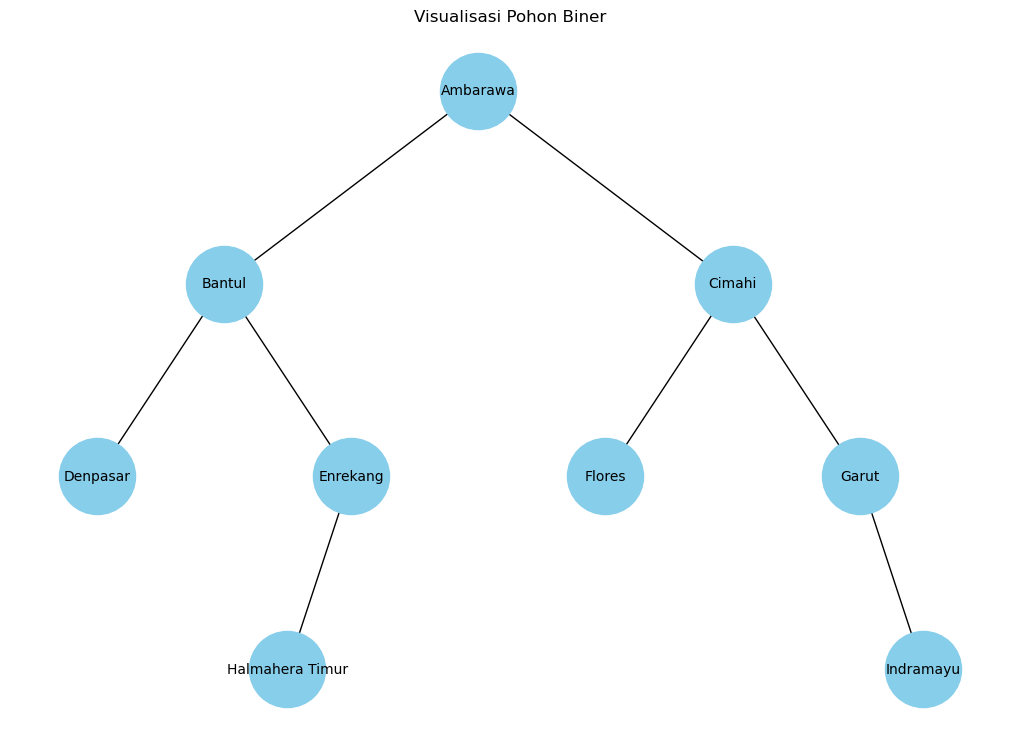

In [3]:
class SimpulPohonBiner(object):
    def __init__(self, data):
        self.data = data
        self.kiri = None
        self.kanan = None

if __name__ == "__main__": 
    import matplotlib.pyplot as plt
    import networkx as nx
    
    # Membuat simpul-simpul dan mengisi data
    A = SimpulPohonBiner('Ambarawa')
    B = SimpulPohonBiner('Bantul')
    C = SimpulPohonBiner('Cimahi')
    D = SimpulPohonBiner('Denpasar')
    E = SimpulPohonBiner('Enrekang')
    F = SimpulPohonBiner('Flores')
    G = SimpulPohonBiner('Garut')
    H = SimpulPohonBiner('Halmahera Timur')
    I = SimpulPohonBiner('Indramayu')
    J = SimpulPohonBiner('Jakarta')
    
    # Menghubungkan simpul ortu-anak
    A.kiri = B; A.kanan = C
    B.kiri = D; B.kanan = E
    C.kiri = F; C.kanan = G
    E.kiri = H
    G.kanan = I
    
    def add_edges(graph, node, pos, x=0, y=0, layer=1, dx=1.0):
        if node is not None:
            pos[node.data] = (x, y)
            if node.kiri:
                graph.add_edge(node.data, node.kiri.data)
                new_dx = dx / 2
                add_edges(graph, node.kiri, pos, x - new_dx, y - 1, layer + 1, new_dx)
            if node.kanan:
                graph.add_edge(node.data, node.kanan.data)
                new_dx = dx / 2
                add_edges(graph, node.kanan, pos, x + new_dx, y - 1, layer + 1, new_dx)
    
    # Membuat graph dan posisi node
    G = nx.DiGraph()
    pos = {}
    
    # Menambahkan edge ke graph
    add_edges(G, A, pos)
    
    # Menggambar graph
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, arrows=False, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
    plt.title('Visualisasi Pohon Biner')
    plt.show()


## 9.4 B

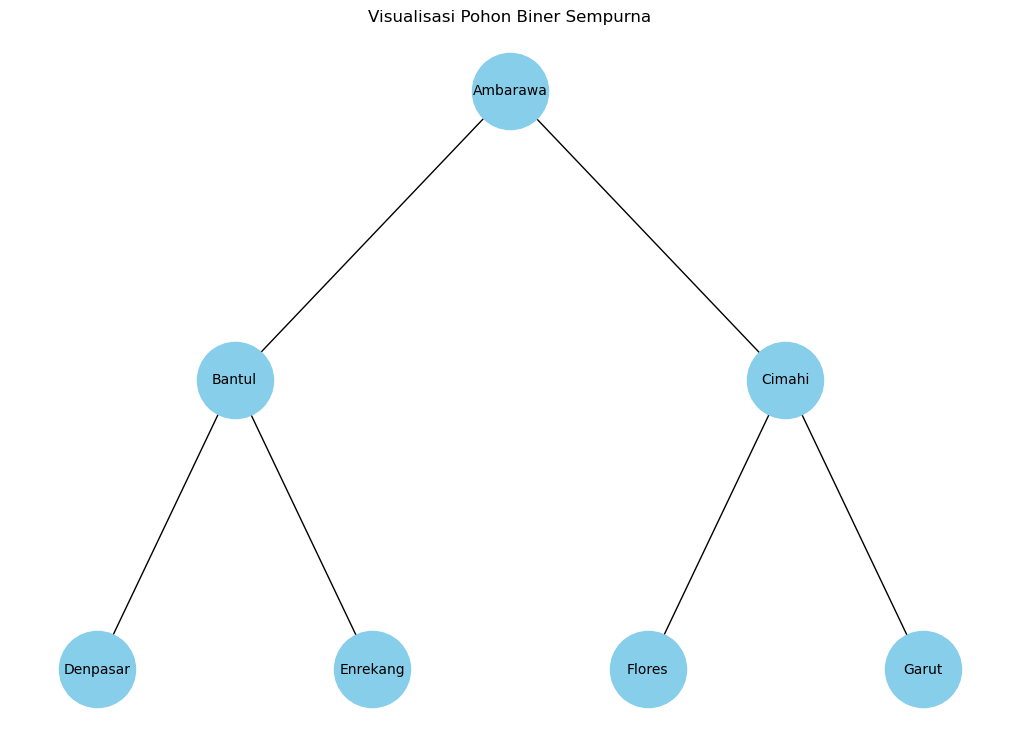

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

class SimpulPohonBiner:
    def __init__(self, data):
        self.data = data
        self.kiri = None
        self.kanan = None

# Membuat simpul-simpul dan mengisi data
A = SimpulPohonBiner('Ambarawa')
B = SimpulPohonBiner('Bantul')
C = SimpulPohonBiner('Cimahi')
D = SimpulPohonBiner('Denpasar')
E = SimpulPohonBiner('Enrekang')
F = SimpulPohonBiner('Flores')
G = SimpulPohonBiner('Garut')

# Menghubungkan simpul ortu-anak untuk membuat pohon biner sempurna
A.kiri = B; A.kanan = C
B.kiri = D; B.kanan = E
C.kiri = F; C.kanan = G

def add_edges(graph, node, pos, x=0, y=0, layer=1, dx=1.0):
    if node is not None:
        pos[node.data] = (x, y)
        if node.kiri:
            graph.add_edge(node.data, node.kiri.data)
            new_dx = dx / 2
            add_edges(graph, node.kiri, pos, x - new_dx, y - 1, layer + 1, new_dx)
        if node.kanan:
            graph.add_edge(node.data, node.kanan.data)
            new_dx = dx / 2
            add_edges(graph, node.kanan, pos, x + new_dx, y - 1, layer + 1, new_dx)

# Membuat graph dan posisi node
G = nx.DiGraph()
pos = {}

# Menambahkan edge ke graph
add_edges(G, A, pos)

# Menggambar graph
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, arrows=False, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.title('Visualisasi Pohon Biner Sempurna')
plt.show()


## 9.5 Traversal

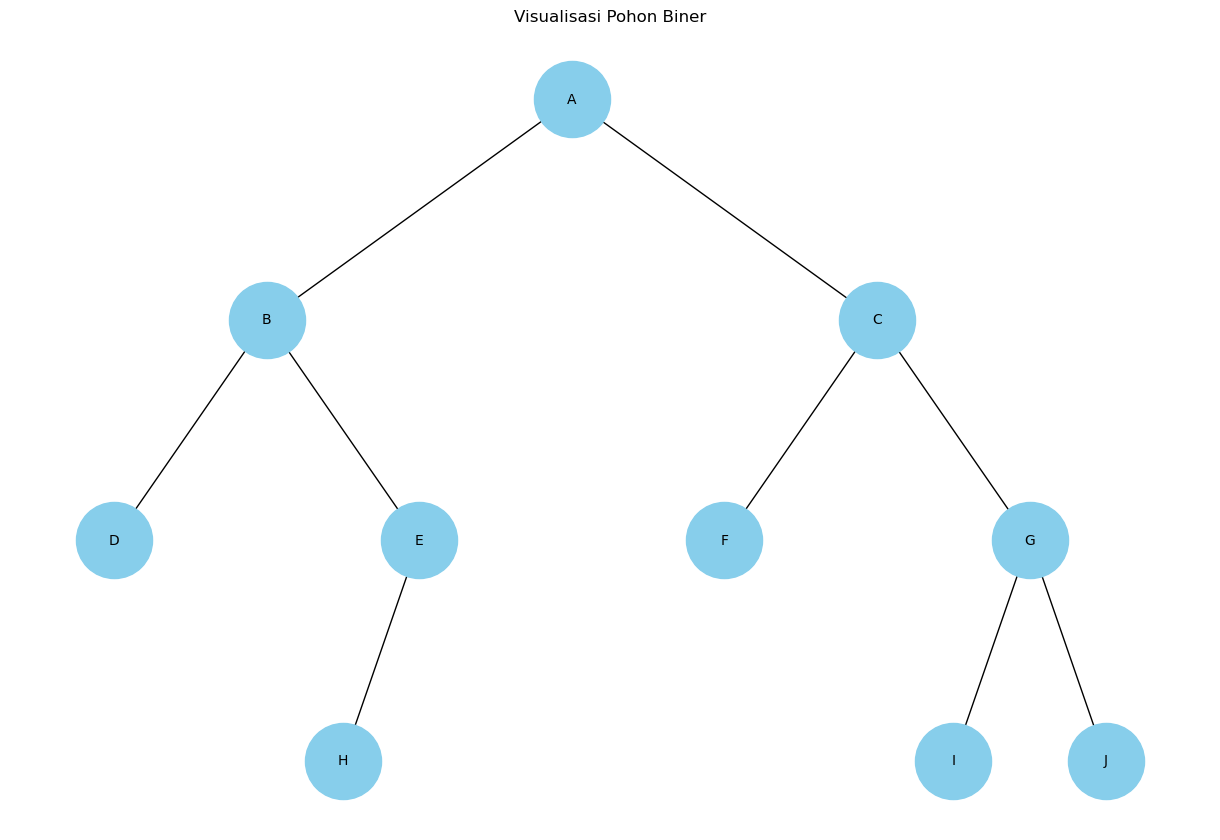

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

class SimpulPohonBiner:
    def __init__(self, data):
        self.data = data
        self.kiri = None
        self.kanan = None

# Inisialisasi simpul kota
A = SimpulPohonBiner('Solo')         # A
B = SimpulPohonBiner('Kartasura')    # B
C = SimpulPohonBiner('Klaten')       # C
D = SimpulPohonBiner('Boyolali')     # D
E = SimpulPohonBiner('Sukoharjo')    # E
F = SimpulPohonBiner('Delanggu')     # F
G = SimpulPohonBiner('Prambanan')    # G
H = SimpulPohonBiner('Wonogiri')     # H
I = SimpulPohonBiner('Sleman')       # I
J = SimpulPohonBiner('Yogyakarta')   # J

# Bangun struktur pohon kota
A.kiri = B; A.kanan = C
B.kiri = D; B.kanan = E
C.kiri = F; C.kanan = G
E.kiri = H
G.kiri = I; G.kanan = J

# Fungsi untuk menambahkan edge dan posisi visualisasi
def add_edges(graph, node, pos, x=0, y=0, layer=1, dx=1.0):
    if node is not None:
        pos[node.data] = (x, y)
        if node.kiri:
            graph.add_edge(node.data, node.kiri.data)
            new_dx = dx / 2
            add_edges(graph, node.kiri, pos, x - new_dx, y - 1, layer + 1, new_dx)
        if node.kanan:
            graph.add_edge(node.data, node.kanan.data)
            new_dx = dx / 2
            add_edges(graph, node.kanan, pos, x + new_dx, y - 1, layer + 1, new_dx)

# Visualisasi pohon kota
G_visual = nx.DiGraph()
pos = {}
add_edges(G_visual, A, pos)

plt.figure(figsize=(12, 8))
nx.draw(G_visual, pos, with_labels=True, arrows=False, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.title('Visualisasi Pohon Perjalanan Rudi dari Solo ke Yogyakarta')
plt.show()

# Fungsi untuk mencari jalur dari root ke tujuan
def cari_jalur(root, tujuan, jalur=[]):
    if root is None:
        return None
    jalur.append(root.data)
    if root.data == tujuan:
        return jalur
    left_path = cari_jalur(root.kiri, tujuan, jalur.copy())
    if left_path:
        return left_path
    right_path = cari_jalur(root.kanan, tujuan, jalur.copy())
    if right_path:
        return right_path
    return None

# Fungsi traversal
def preorder(node, hasil=[]):
    if node:
        hasil.append(node.data)
        preorder(node.kiri, hasil)
        preorder(node.kanan, hasil)
    return hasil

def inorder(node, hasil=[]):
    if node:
        inorder(node.kiri, hasil)
        hasil.append(node.data)
        inorder(node.kanan, hasil)
    return hasil

def postorder(node, hasil=[]):
    if node:
        postorder(node.kiri, hasil)
        postorder(node.kanan, hasil)
        hasil.append(node.data)
    return hasil

# Cetak hasil
jalur_rudi = cari_jalur(A, 'Yogyakarta')
print("Jalur dari Solo ke Yogyakarta:")
print(" ➝ ".join(jalur_rudi))

print("\nPre-order Traversal:")
print(preorder(A, []))

print("\nIn-order Traversal:")
print(inorder(A, []))

print("\nPost-order Traversal:")
print(postorder(A, []))


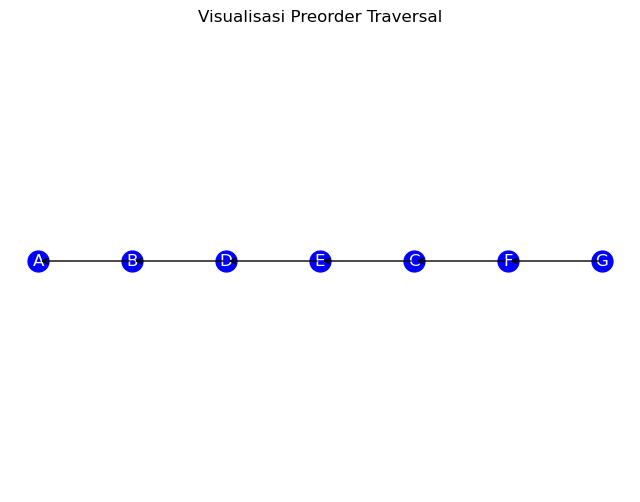

In [9]:
import matplotlib.pyplot as plt

class SimpulPohonBiner:
    def __init__(self, data):
        self.data = data
        self.kiri = None
        self.kanan = None

def preorder_trav(subpohon, traversal):
    if subpohon is not None:
        traversal.append(subpohon.data)
        preorder_trav(subpohon.kiri, traversal)
        preorder_trav(subpohon.kanan, traversal)

    return traversal

def draw_arrow(ax, start, end, text):
    ax.annotate("", xy=start, xytext=end, arrowprops=dict(arrowstyle="->"))
    ax.text((start[0] + end[0]) / 2, (start[1] + end[1]) / 2, text, ha='center')

def visualize_preorder_traversal(root):
    traversal = preorder_trav(root, [])
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title('Visualisasi Preorder Traversal')

    # Menentukan posisi simpul
    pos = {}
    level_height = 1
    for node in traversal:
        pos[node] = (traversal.index(node), -level_height)
    
    # Menggambar simpul
    for node in traversal:
        ax.plot(traversal.index(node), -level_height, 'bo', markersize=15)
        ax.text(traversal.index(node), -level_height, node, ha='center', va='center', color='white', fontsize=12)

    # Menggambar panah antara simpul
    for i in range(len(traversal) - 1):
        start_node = traversal[i]
        end_node = traversal[i + 1]
        start_pos = pos[start_node]
        end_pos = pos[end_node]
        draw_arrow(ax, start_pos, end_pos, '')

    ax.axis('off')
    plt.show()

# Membuat pohon biner
A = SimpulPohonBiner('A')
B = SimpulPohonBiner('B')
C = SimpulPohonBiner('C')
D = SimpulPohonBiner('D')
E = SimpulPohonBiner('E')
F = SimpulPohonBiner('F')
G = SimpulPohonBiner('G')

A.kiri = B
A.kanan = C
B.kiri = D
B.kanan = E
C.kiri = F
C.kanan = G

# Visualisasi preorder traversal
visualize_preorder_traversal(A)


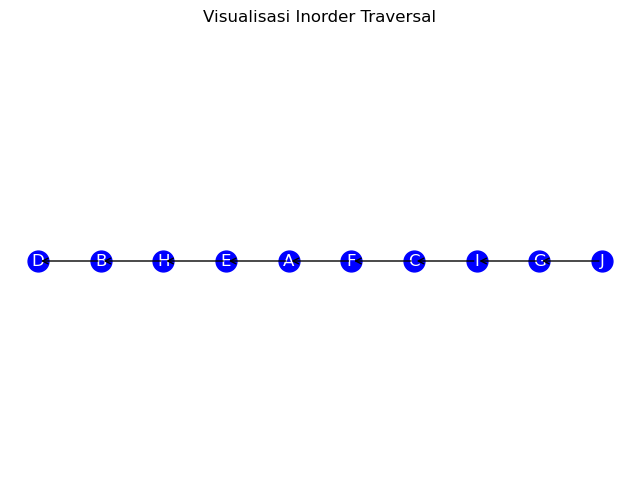

In [7]:
import matplotlib.pyplot as plt

class SimpulPohonBiner:
    def __init__(self, data):
        self.data = data
        self.kiri = None
        self.kanan = None

def inorder_trav(subpohon, traversal):
    if subpohon is not None:
        inorder_trav(subpohon.kiri, traversal)
        traversal.append(subpohon.data)
        inorder_trav(subpohon.kanan, traversal)

    return traversal

def draw_arrow(ax, start, end, text):
    ax.annotate("", xy=start, xytext=end, arrowprops=dict(arrowstyle="->"))
    ax.text((start[0] + end[0]) / 2, (start[1] + end[1]) / 2, text, ha='center')

def visualize_inorder_traversal(root):
    traversal = inorder_trav(root, [])
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title('Visualisasi Inorder Traversal')

    # Menentukan posisi simpul
    pos = {}
    level_height = 1
    for node in traversal:
        pos[node] = (traversal.index(node), -level_height)
    
    # Menggambar simpul
    for node in traversal:
        ax.plot(traversal.index(node), -level_height, 'bo', markersize=15)
        ax.text(traversal.index(node), -level_height, node, ha='center', va='center', color='white', fontsize=12)

    # Menggambar panah antara simpul
    for i in range(len(traversal) - 1):
        start_node = traversal[i]
        end_node = traversal[i + 1]
        start_pos = pos[start_node]
        end_pos = pos[end_node]
        draw_arrow(ax, start_pos, end_pos, '')

    ax.axis('off')
    plt.show()

# Membuat simpul-simpul dan mengisi data
A = SimpulPohonBiner('A')
B = SimpulPohonBiner('B')
C = SimpulPohonBiner('C')
D = SimpulPohonBiner('D')
E = SimpulPohonBiner('E')
F = SimpulPohonBiner('F')
G = SimpulPohonBiner('G')
H = SimpulPohonBiner('H')
I = SimpulPohonBiner('I')
J = SimpulPohonBiner('J')

# Menghubungkan simpul ortu-anak sesuai dengan struktur yang diberikan
A.kiri = B; A.kanan = C
B.kiri = D; B.kanan = E
C.kiri = F; C.kanan = G
E.kiri = H
G.kiri = I; G.kanan = J

# Visualisasi inorder traversal
visualize_inorder_traversal(A)


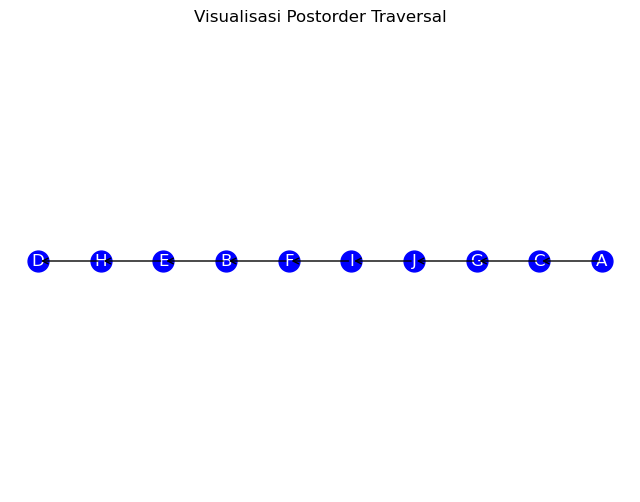

In [8]:
import matplotlib.pyplot as plt

class SimpulPohonBiner:
    def __init__(self, data):
        self.data = data
        self.kiri = None
        self.kanan = None

def postorder_trav(subpohon, traversal):
    if subpohon is not None:
        postorder_trav(subpohon.kiri, traversal)
        postorder_trav(subpohon.kanan, traversal)
        traversal.append(subpohon.data)

    return traversal

def draw_arrow(ax, start, end, text):
    ax.annotate("", xy=start, xytext=end, arrowprops=dict(arrowstyle="->"))
    ax.text((start[0] + end[0]) / 2, (start[1] + end[1]) / 2, text, ha='center')

def visualize_postorder_traversal(root):
    traversal = postorder_trav(root, [])
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title('Visualisasi Postorder Traversal')

    # Menentukan posisi simpul
    pos = {}
    level_height = 1
    for node in traversal:
        pos[node] = (traversal.index(node), -level_height)
    
    # Menggambar simpul
    for node in traversal:
        ax.plot(traversal.index(node), -level_height, 'bo', markersize=15)
        ax.text(traversal.index(node), -level_height, node, ha='center', va='center', color='white', fontsize=12)

    # Menggambar panah antara simpul
    for i in range(len(traversal) - 1):
        start_node = traversal[i]
        end_node = traversal[i + 1]
        start_pos = pos[start_node]
        end_pos = pos[end_node]
        draw_arrow(ax, start_pos, end_pos, '')

    ax.axis('off')
    plt.show()

# Membuat simpul-simpul dan mengisi data
A = SimpulPohonBiner('A')
B = SimpulPohonBiner('B')
C = SimpulPohonBiner('C')
D = SimpulPohonBiner('D')
E = SimpulPohonBiner('E')
F = SimpulPohonBiner('F')
G = SimpulPohonBiner('G')
H = SimpulPohonBiner('H')
I = SimpulPohonBiner('I')
J = SimpulPohonBiner('J')

# Menghubungkan simpul ortu-anak sesuai dengan struktur yang diberikan
A.kiri = B; A.kanan = C
B.kiri = D; B.kanan = E
C.kiri = F; C.kanan = G
E.kiri = H
G.kiri = I; G.kanan = J

# Visualisasi postorder traversal
visualize_postorder_traversal(A)


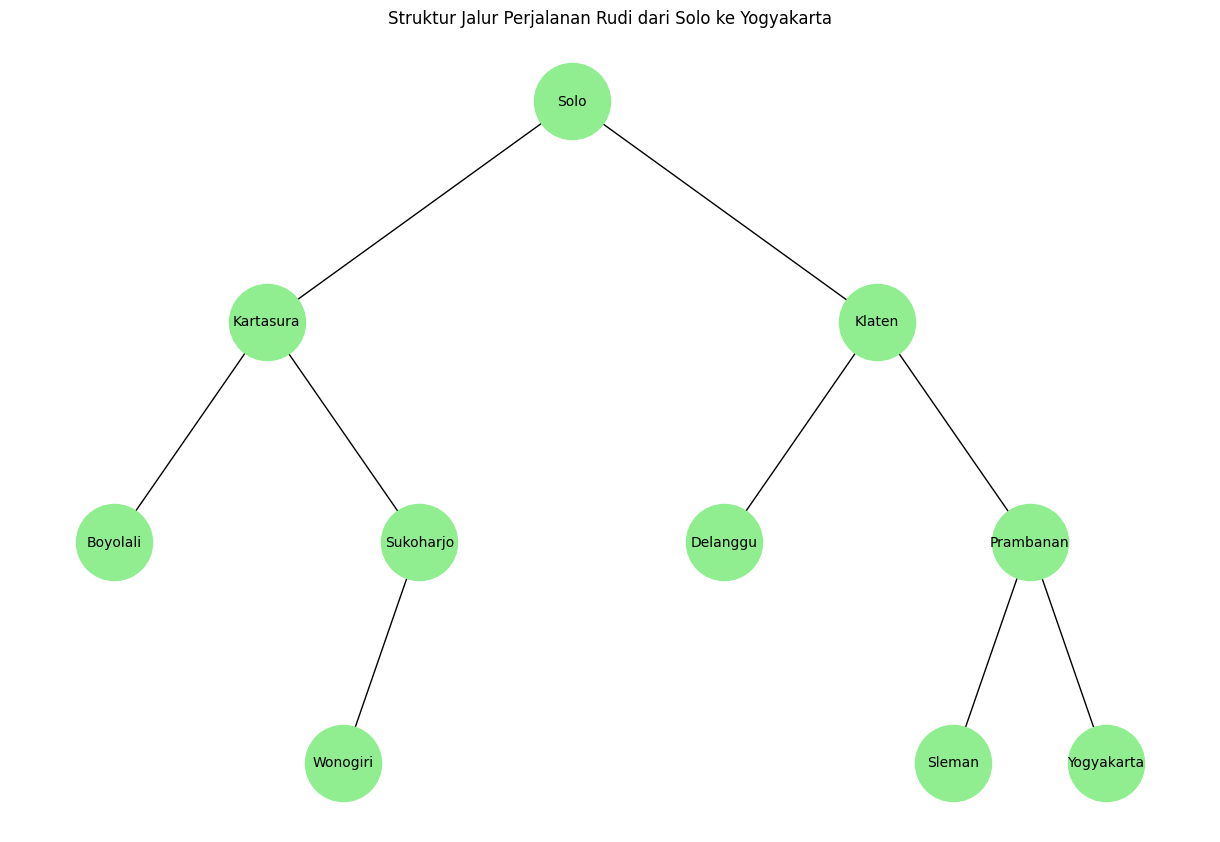

Pre-order Traversal : Solo -> Kartasura -> Boyolali -> Sukoharjo -> Wonogiri -> Klaten -> Delanggu -> Prambanan -> Sleman -> Yogyakarta
In-order Traversal  : Boyolali -> Kartasura -> Wonogiri -> Sukoharjo -> Solo -> Delanggu -> Klaten -> Sleman -> Prambanan -> Yogyakarta
Post-order Traversal: Boyolali -> Wonogiri -> Sukoharjo -> Kartasura -> Delanggu -> Sleman -> Yogyakarta -> Prambanan -> Klaten -> Solo
Jalur dari Solo ke Yogyakarta: Solo -> Klaten -> Prambanan -> Yogyakarta


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

class Kota:
    def __init__(self, nama):
        self.nama = nama
        self.kiri = None  # jalur kiri
        self.kanan = None  # jalur kanan

# Membuat simpul kota
Solo = Kota('Solo')
Kartasura = Kota('Kartasura')
Klaten = Kota('Klaten')
Boyolali = Kota('Boyolali')
Sukoharjo = Kota('Sukoharjo')
Delanggu = Kota('Delanggu')
Prambanan = Kota('Prambanan')
Wonogiri = Kota('Wonogiri')
Sleman = Kota('Sleman')
Yogyakarta = Kota('Yogyakarta')

# Menyusun struktur kota sebagai pohon biner
Solo.kiri = Kartasura; Solo.kanan = Klaten
Kartasura.kiri = Boyolali; Kartasura.kanan = Sukoharjo
Klaten.kiri = Delanggu; Klaten.kanan = Prambanan
Sukoharjo.kiri = Wonogiri
Prambanan.kiri = Sleman; Prambanan.kanan = Yogyakarta

# Fungsi untuk membangun pohon di graph
def bangun_jalur(graph, kota, posisi, x=0, y=0, dx=1.0):
    if kota:
        posisi[kota.nama] = (x, y)
        if kota.kiri:
            graph.add_edge(kota.nama, kota.kiri.nama)
            bangun_jalur(graph, kota.kiri, posisi, x - dx, y - 1, dx / 2)
        if kota.kanan:
            graph.add_edge(kota.nama, kota.kanan.nama)
            bangun_jalur(graph, kota.kanan, posisi, x + dx, y - 1, dx / 2)

# Fungsi traversal
def preorder(kota, hasil):
    if kota:
        hasil.append(kota.nama)
        preorder(kota.kiri, hasil)
        preorder(kota.kanan, hasil)

def inorder(kota, hasil):
    if kota:
        inorder(kota.kiri, hasil)
        hasil.append(kota.nama)
        inorder(kota.kanan, hasil)

def postorder(kota, hasil):
    if kota:
        postorder(kota.kiri, hasil)
        postorder(kota.kanan, hasil)
        hasil.append(kota.nama)

# Fungsi pencarian jalur dari Solo ke Yogyakarta
def cari_jalur_awal_akhir(kota, tujuan, jalur=[]):
    if kota is None:
        return None
    jalur.append(kota.nama)
    if kota.nama == tujuan:
        return list(jalur)
    if kota.kiri:
        hasil = cari_jalur_awal_akhir(kota.kiri, tujuan, jalur)
        if hasil:
            return hasil
    if kota.kanan:
        hasil = cari_jalur_awal_akhir(kota.kanan, tujuan, jalur)
        if hasil:
            return hasil
    jalur.pop()
    return None

# Visualisasi pohon kota
G = nx.DiGraph()
posisi = {}
bangun_jalur(G, Solo, posisi)

plt.figure(figsize=(12, 8))
nx.draw(G, posisi, with_labels=True, arrows=False, node_size=3000,
        node_color='lightgreen', font_size=10, font_color='black')
plt.title('Struktur Jalur Perjalanan Rudi dari Solo ke Yogyakarta')
plt.show()

# Menampilkan hasil traversal
hasil_pre = []
hasil_in = []
hasil_post = []
preorder(Solo, hasil_pre)
inorder(Solo, hasil_in)
postorder(Solo, hasil_post)

print("Pre-order Traversal :", ' -> '.join(hasil_pre))
print("In-order Traversal  :", ' -> '.join(hasil_in))
print("Post-order Traversal:", ' -> '.join(hasil_post))

# Menampilkan jalur dari Solo ke Yogyakarta
jalur_ke_jogja = cari_jalur_awal_akhir(Solo, 'Yogyakarta')
print("Jalur dari Solo ke Yogyakarta:", ' -> '.join(jalur_ke_jogja))


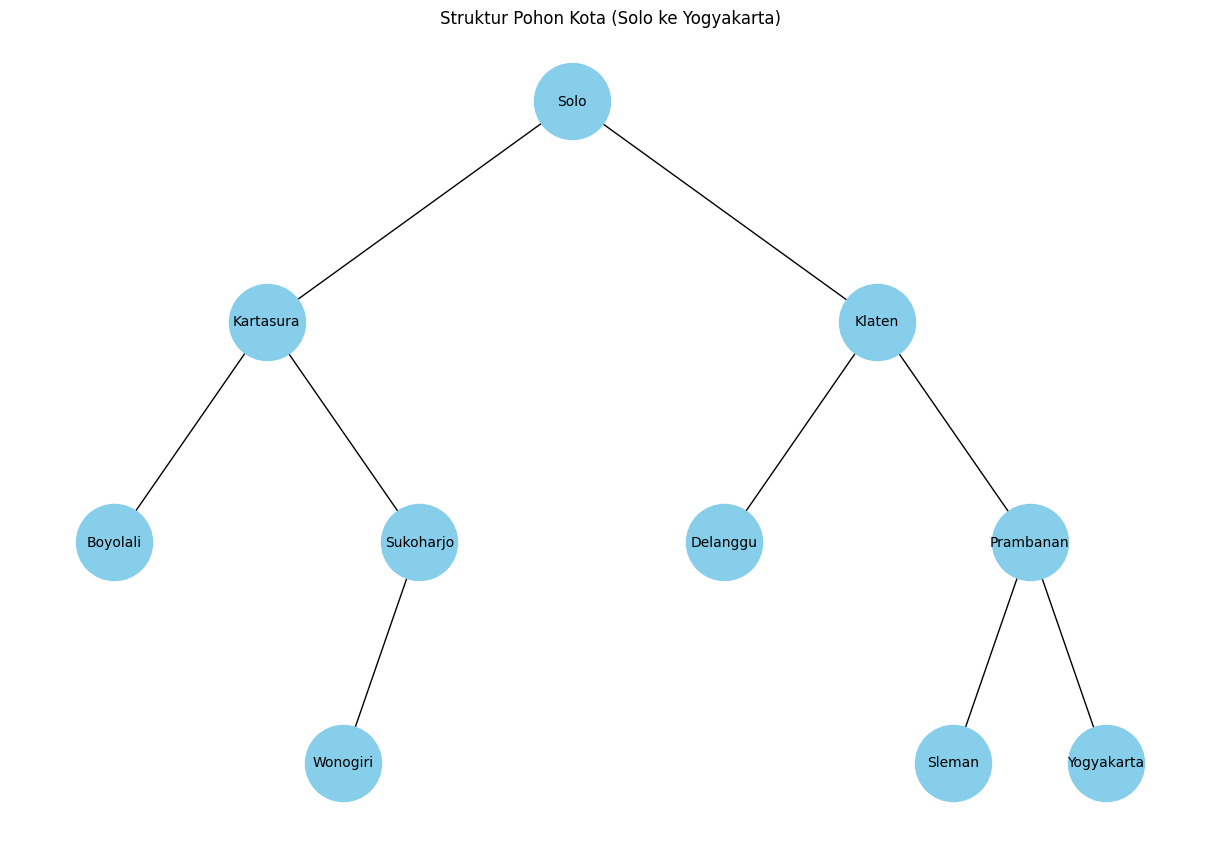

Pre-order Traversal: ['Solo', 'Kartasura', 'Boyolali', 'Sukoharjo', 'Wonogiri', 'Klaten', 'Delanggu', 'Prambanan', 'Sleman', 'Yogyakarta']
In-order Traversal: ['Boyolali', 'Kartasura', 'Wonogiri', 'Sukoharjo', 'Solo', 'Delanggu', 'Klaten', 'Sleman', 'Prambanan', 'Yogyakarta']
Post-order Traversal: ['Boyolali', 'Wonogiri', 'Sukoharjo', 'Kartasura', 'Delanggu', 'Sleman', 'Yogyakarta', 'Prambanan', 'Klaten', 'Solo']
Jalur dari Solo ke Yogyakarta: ['Solo', 'Klaten', 'Prambanan', 'Yogyakarta']


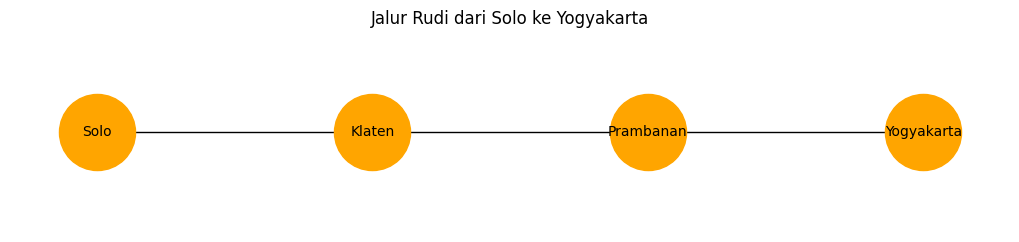

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# ====== Definisi Struktur Simpul Pohon ======
class KotaNode:
    def __init__(self, nama):
        self.nama = nama
        self.kiri = None
        self.kanan = None

# ====== Membangun Struktur Pohon Kota ======
Solo = KotaNode('Solo')
Kartasura = KotaNode('Kartasura')
Klaten = KotaNode('Klaten')
Boyolali = KotaNode('Boyolali')
Sukoharjo = KotaNode('Sukoharjo')
Delanggu = KotaNode('Delanggu')
Prambanan = KotaNode('Prambanan')
Wonogiri = KotaNode('Wonogiri')
Sleman = KotaNode('Sleman')
Yogyakarta = KotaNode('Yogyakarta')

# Struktur pohon biner:
Solo.kiri = Kartasura
Solo.kanan = Klaten
Kartasura.kiri = Boyolali
Kartasura.kanan = Sukoharjo
Klaten.kiri = Delanggu
Klaten.kanan = Prambanan
Sukoharjo.kiri = Wonogiri
Prambanan.kiri = Sleman
Prambanan.kanan = Yogyakarta

# ====== Fungsi Traversal ======
def preorder(node):
    return [node.nama] + preorder(node.kiri) + preorder(node.kanan) if node else []

def inorder(node):
    return inorder(node.kiri) + [node.nama] + inorder(node.kanan) if node else []

def postorder(node):
    return postorder(node.kiri) + postorder(node.kanan) + [node.nama] if node else []

# ====== Fungsi Cari Jalur dari A ke B ======
def cari_jalur_awal_akhir(node, tujuan, jalur=[]):
    if node is None:
        return None
    jalur = jalur + [node.nama]
    if node.nama == tujuan:
        return jalur
    jalur_kiri = cari_jalur_awal_akhir(node.kiri, tujuan, jalur)
    if jalur_kiri:
        return jalur_kiri
    jalur_kanan = cari_jalur_awal_akhir(node.kanan, tujuan, jalur)
    if jalur_kanan:
        return jalur_kanan
    return None

# ====== Visualisasi Pohon Lengkap ======
def tambah_edge_ke_graf(graph, node, pos, x=0, y=0, dx=1.0):
    if node is not None:
        pos[node.nama] = (x, y)
        if node.kiri:
            graph.add_edge(node.nama, node.kiri.nama)
            tambah_edge_ke_graf(graph, node.kiri, pos, x - dx, y - 1, dx / 2)
        if node.kanan:
            graph.add_edge(node.nama, node.kanan.nama)
            tambah_edge_ke_graf(graph, node.kanan, pos, x + dx, y - 1, dx / 2)

graf_kota = nx.DiGraph()
posisi = {}
tambah_edge_ke_graf(graf_kota, Solo, posisi)

plt.figure(figsize=(12, 8))
nx.draw(graf_kota, posisi, with_labels=True, arrows=False, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.title('Struktur Pohon Kota (Solo ke Yogyakarta)')
plt.show()

# ====== Tampilkan Traversal & Jalur ======
print("Pre-order Traversal:", preorder(Solo))
print("In-order Traversal:", inorder(Solo))
print("Post-order Traversal:", postorder(Solo))

jalur_ke_jogja = cari_jalur_awal_akhir(Solo, 'Yogyakarta')
print("Jalur dari Solo ke Yogyakarta:", jalur_ke_jogja)

# ====== Visualisasi Jalur Saja (Solo -> Yogyakarta) ======
graf_jalur = nx.DiGraph()
pos_jalur = {}

def buat_graf_jalur(jalur_kota):
    prev = None
    for i, kota in enumerate(jalur_kota):
        pos_jalur[kota] = (i, 0)  # horizontal layout
        if prev:
            graf_jalur.add_edge(prev, kota)
        prev = kota

buat_graf_jalur(jalur_ke_jogja)

plt.figure(figsize=(10, 2))
nx.draw(graf_jalur, pos_jalur, with_labels=True, arrows=False, node_size=3000,
        node_color='orange', font_size=10, font_color='black')
plt.title('Jalur Rudi dari Solo ke Yogyakarta')
plt.show()


Pre-order Traversal: ['Solo', 'Kartasura', 'Boyolali', 'Sukoharjo', 'Wonogiri', 'Klaten', 'Delanggu', 'Prambanan', 'Sleman', 'Yogyakarta']
In-order Traversal: ['Boyolali', 'Kartasura', 'Wonogiri', 'Sukoharjo', 'Solo', 'Delanggu', 'Klaten', 'Sleman', 'Prambanan', 'Yogyakarta']
Post-order Traversal: ['Boyolali', 'Wonogiri', 'Sukoharjo', 'Kartasura', 'Delanggu', 'Sleman', 'Yogyakarta', 'Prambanan', 'Klaten', 'Solo']
Jalur dari Solo ke Yogyakarta: ['Solo', 'Klaten', 'Prambanan', 'Yogyakarta']


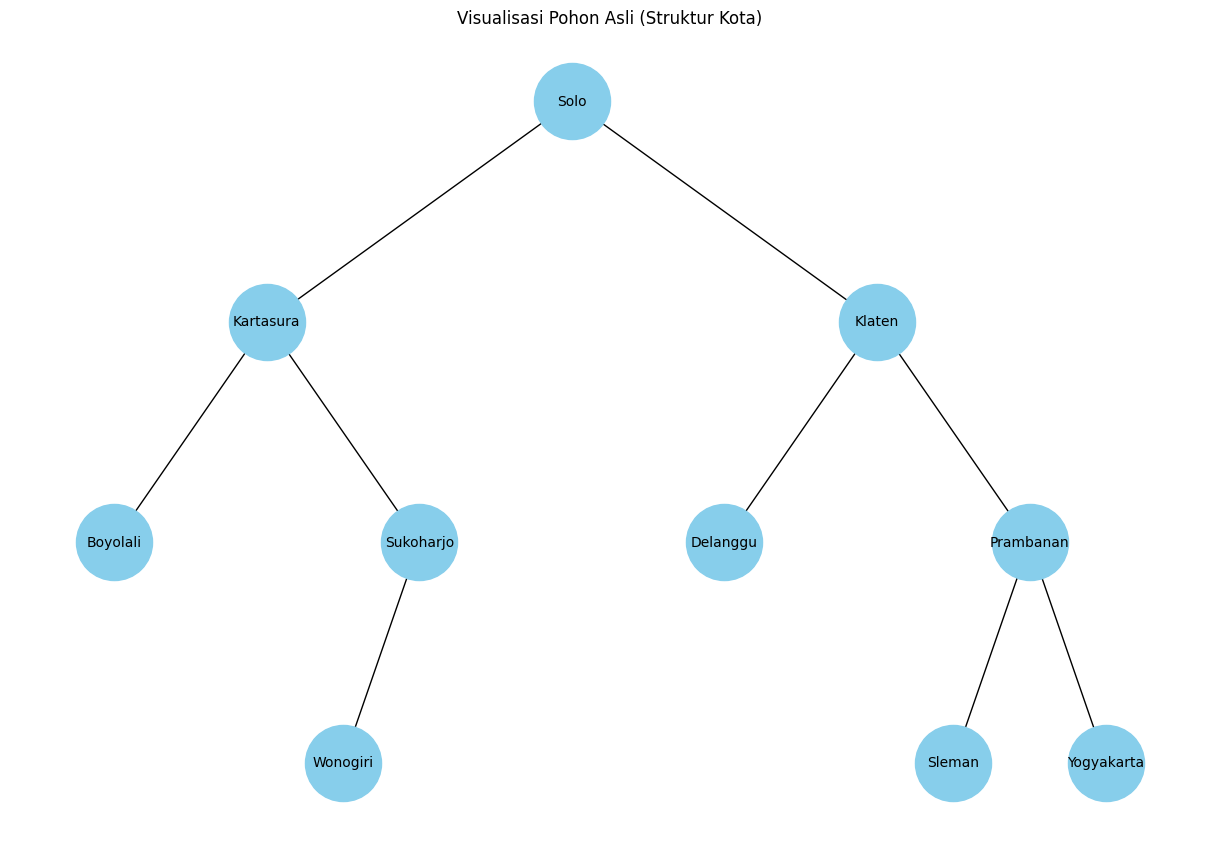

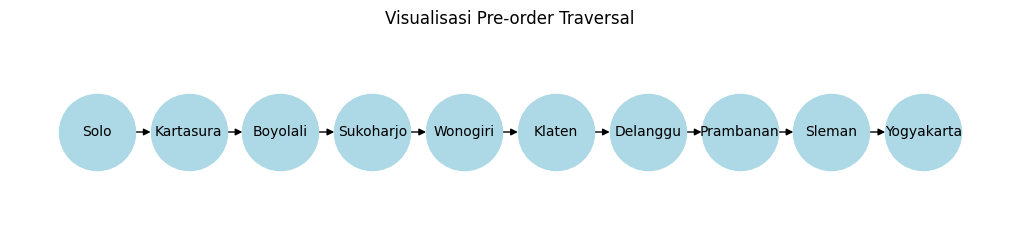

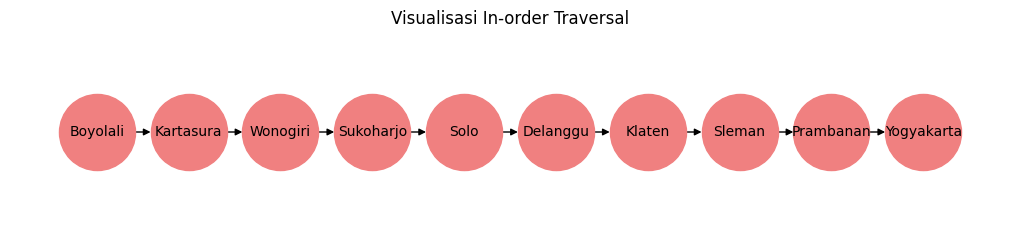

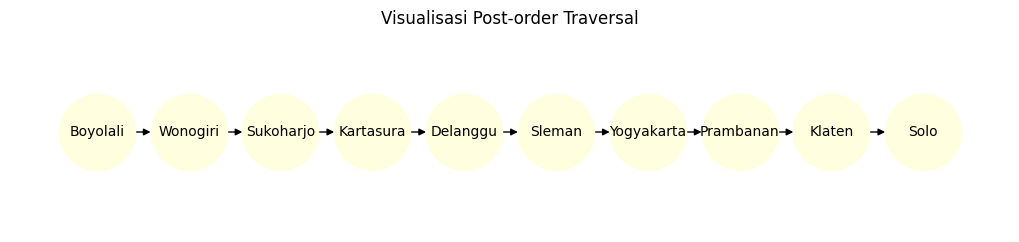

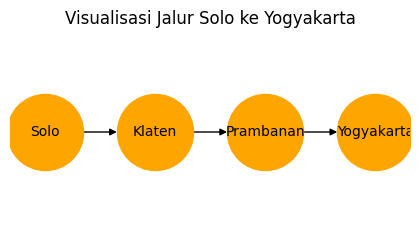

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Definisi kelas simpul pohon biner
class SimpulPohonBiner:
    def __init__(self, data):
        self.data = data
        self.kiri = None
        self.kanan = None

# Buat simpul kota
A = SimpulPohonBiner('Solo')        # A
B = SimpulPohonBiner('Kartasura')   # B
C = SimpulPohonBiner('Klaten')      # C
D = SimpulPohonBiner('Boyolali')    # D
E = SimpulPohonBiner('Sukoharjo')   # E
F = SimpulPohonBiner('Delanggu')    # F
G = SimpulPohonBiner('Prambanan')   # G
H = SimpulPohonBiner('Wonogiri')    # H
I = SimpulPohonBiner('Sleman')      # I
J = SimpulPohonBiner('Yogyakarta')  # J

# Hubungkan sesuai struktur pohon
A.kiri = B; A.kanan = C
B.kiri = D; B.kanan = E
C.kiri = F; C.kanan = G
E.kiri = H
G.kiri = I; G.kanan = J

# Fungsi traversal
def preorder(node, result):
    if node:
        result.append(node.data)
        preorder(node.kiri, result)
        preorder(node.kanan, result)

def inorder(node, result):
    if node:
        inorder(node.kiri, result)
        result.append(node.data)
        inorder(node.kanan, result)

def postorder(node, result):
    if node:
        postorder(node.kiri, result)
        postorder(node.kanan, result)
        result.append(node.data)

# Fungsi cari jalur dari asal ke tujuan (menggunakan DFS)
def cari_jalur(node, tujuan, jalur):
    if node is None:
        return False
    jalur.append(node.data)
    if node.data == tujuan:
        return True
    if cari_jalur(node.kiri, tujuan, jalur):
        return True
    if cari_jalur(node.kanan, tujuan, jalur):
        return True
    jalur.pop()
    return False

# Fungsi menambahkan edge ke graph untuk visualisasi pohon asli
def tambah_edge(graph, node, pos, x=0, y=0, dx=1.0):
    if node is not None:
        pos[node.data] = (x, y)
        if node.kiri:
            graph.add_edge(node.data, node.kiri.data)
            tambah_edge(graph, node.kiri, pos, x - dx, y - 1, dx / 2)
        if node.kanan:
            graph.add_edge(node.data, node.kanan.data)
            tambah_edge(graph, node.kanan, pos, x + dx, y - 1, dx / 2)

# Fungsi visualisasi traversal sebagai rantai linear
def visualisasi_traversal(jalur, judul, warna_node='lightgreen'):
    G_traversal = nx.DiGraph()
    pos_traversal = {}
    prev = None
    for i, kota in enumerate(jalur):
        pos_traversal[kota] = (i, 0)
        if prev:
            G_traversal.add_edge(prev, kota)
        prev = kota

    plt.figure(figsize=(len(jalur), 2))
    nx.draw(G_traversal, pos_traversal, with_labels=True, arrows=True, node_size=3000,
            node_color=warna_node, font_size=10, font_color='black')
    plt.title(judul)
    plt.show()

# Fungsi visualisasi pohon dari jalur (dipakai untuk jalur Solo -> Yogyakarta)
def visualisasi_jalur_pohon(jalur, judul, warna_node='orange'):
    G_path = nx.DiGraph()
    pos_path = {}
    for i in range(len(jalur)-1):
        G_path.add_edge(jalur[i], jalur[i+1])
        pos_path[jalur[i]] = (i, 0)
    pos_path[jalur[-1]] = (len(jalur)-1, 0)

    plt.figure(figsize=(len(jalur), 2))
    nx.draw(G_path, pos_path, with_labels=True, arrows=True, node_size=3000,
            node_color=warna_node, font_size=10, font_color='black')
    plt.title(judul)
    plt.show()

# --- Main Program ---

# Traversal pohon asli
preorder_list = []
inorder_list = []
postorder_list = []

preorder(A, preorder_list)
inorder(A, inorder_list)
postorder(A, postorder_list)

# Cari jalur dari Solo ke Yogyakarta
jalur_solo_yogya = []
cari_jalur(A, 'Yogyakarta', jalur_solo_yogya)

# Cetak hasil traversal dan jalur
print("Pre-order Traversal:", preorder_list)
print("In-order Traversal:", inorder_list)
print("Post-order Traversal:", postorder_list)
print("Jalur dari Solo ke Yogyakarta:", jalur_solo_yogya)

# Visualisasi pohon asli
G = nx.DiGraph()
pos = {}
tambah_edge(G, A, pos)

plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, arrows=False, node_size=3000,
        node_color='skyblue', font_size=10, font_color='black')
plt.title('Visualisasi Pohon Asli (Struktur Kota)')
plt.show()

# Visualisasi traversal sebagai rantai linear
visualisasi_traversal(preorder_list, 'Visualisasi Pre-order Traversal', 'lightblue')
visualisasi_traversal(inorder_list, 'Visualisasi In-order Traversal', 'lightcoral')
visualisasi_traversal(postorder_list, 'Visualisasi Post-order Traversal', 'lightyellow')

# Visualisasi jalur Solo -> Yogyakarta sebagai rantai linear
visualisasi_jalur_pohon(jalur_solo_yogya, 'Visualisasi Jalur Solo ke Yogyakarta', 'orange')
